**1. Literacy vs. Employment Opportunities**


Bar Plot: Proportion of Literate vs. Illiterate by Employment Type

Data Summary:
              LITERACY                                  EMPLOYMENT_STATUS  \
4                    N          Unemployed, willing and looking for a job   
5                    N      Unemployed, willing but not looking for a job   
2                    N                                     Not Applicable   
1                    N                                           Employed   
3                    N  Unemployed, not willing and not looking for a job   
11                   Y      Unemployed, willing but not looking for a job   
10                   Y          Unemployed, willing and looking for a job   
8                    Y                                     Not Applicable   
6       Not Applicable                                     Not Applicable   
7                    Y                                           Employed   
9                    Y  Unemployed, not willing and not looking for a job   
0   Data Not Available                                 Data No

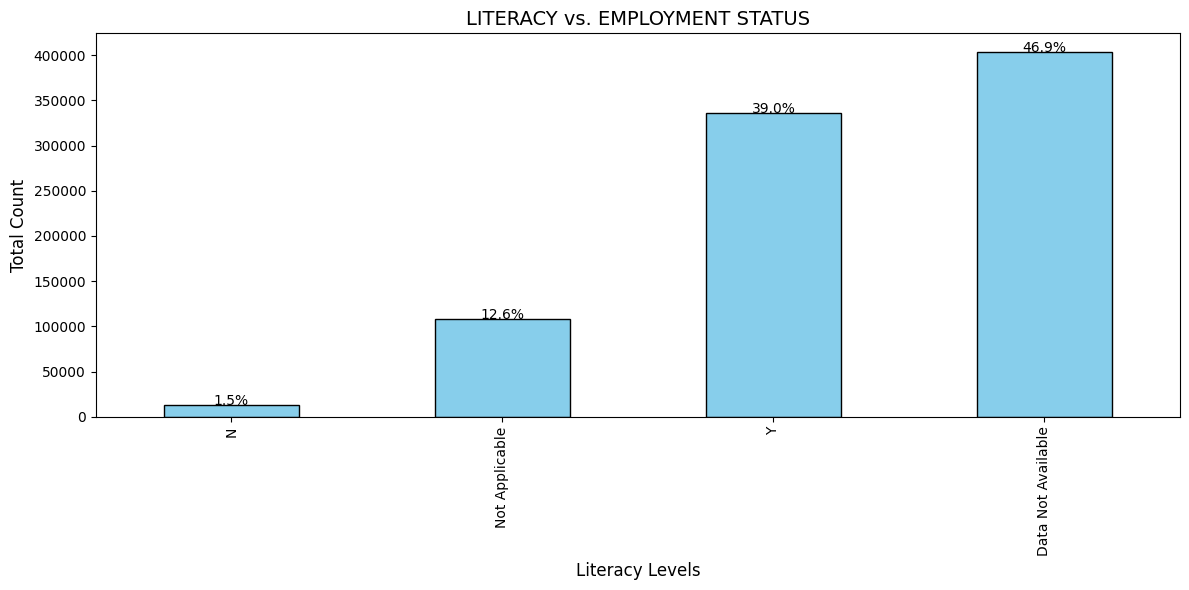

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "E:/MACRO Assignment/People/MasterFile_People.xlsx"
wb_data = pd.read_excel(file_path, engine='openpyxl')

# Summarize the data for Literacy vs. Employment Status
summary = wb_data.groupby(['LITERACY', 'EMPLOYMENT_STATUS']).size().reset_index(name='Count')
total_count = summary['Count'].sum()

# Calculate percentages
summary['Percentage'] = (summary['Count'] / total_count * 100).round(2)

# Sort by Literacy in ascending order
summary = summary.sort_values(by='Count')

# Display data summary
print("Data Summary:")
print(summary)

# Pivot the data for plotting
pivot_data = summary.pivot(index='LITERACY', columns='EMPLOYMENT_STATUS', values='Count')

# Plot the sorted bar chart
plt.figure(figsize=(12, 6))
ax = pivot_data.sum(axis=1).sort_values().plot(kind='bar', color='skyblue', edgecolor='black')

# Add percentages above the bars
for index, value in enumerate(pivot_data.sum(axis=1).sort_values()):
    plt.text(index, value + 1, f"{value / total_count * 100:.1f}%", ha='center', fontsize=10)

# Add labels and title
plt.title('LITERACY vs. EMPLOYMENT STATUS', fontsize=14)
plt.xlabel('Literacy Levels', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


Stacked Bar Plot: Literacy vs. Nature of Occupation

Summary Table:
                                     Count                                 \
NATURE_OF_OCCUPATION Agricultural Labourer Businessman Data Not Available   
LITERACY                                                                    
Data Not Available                     NaN         NaN           403898.0   
N                                    947.0        24.0                NaN   
Not Applicable                         NaN         NaN                NaN   
Y                                   6363.0      7146.0                NaN   

                                                                              \
NATURE_OF_OCCUPATION Home Maker Home-based Worker Industrial Workers Manager   
LITERACY                                                                       
Data Not Available          NaN               NaN                NaN     NaN   
N                        6402.0             240.0              113.0     NaN   
Not Applicable             12.0              

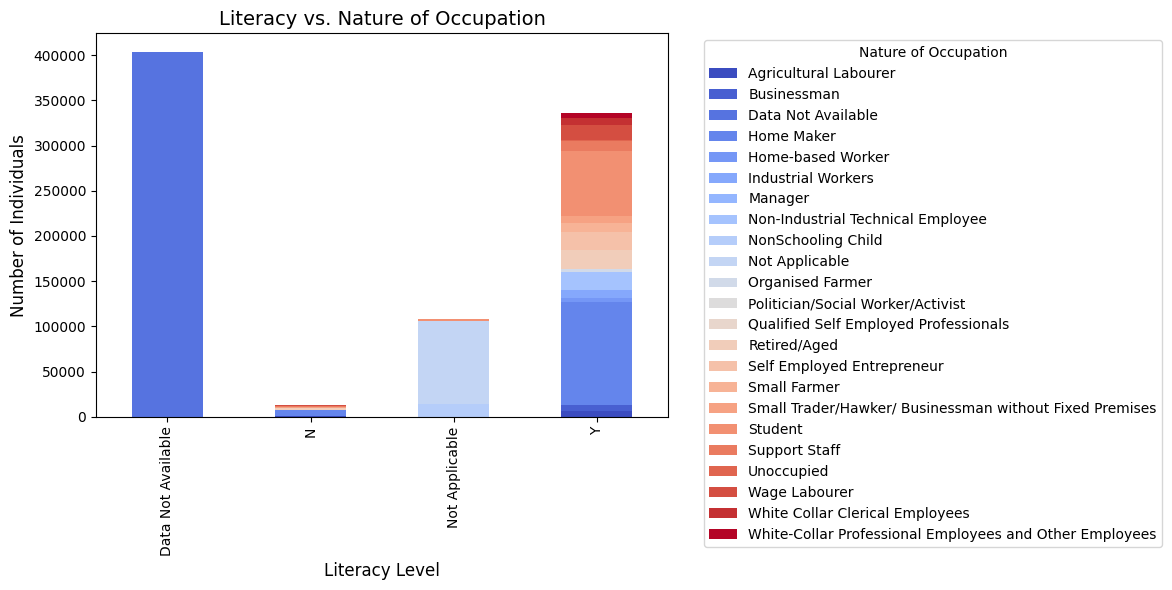

In [3]:
# Group data by Literacy and Nature of Occupation
literacy_occupation = wb_data.groupby(['LITERACY', 'NATURE_OF_OCCUPATION']).size().reset_index(name='Count')

# Calculate total counts for each literacy level
total_by_literacy = literacy_occupation.groupby('LITERACY')['Count'].sum().reset_index(name='Total')

# Merge total counts back to calculate percentages
literacy_occupation = literacy_occupation.merge(total_by_literacy, on='LITERACY')
literacy_occupation['Percentage'] = (literacy_occupation['Count'] / literacy_occupation['Total'] * 100).round(2)

# Display summary table
summary_table = literacy_occupation.pivot(index='LITERACY', columns='NATURE_OF_OCCUPATION', values=['Count', 'Percentage'])
print("Summary Table:")
print(summary_table)

# Plot the stacked bar chart
literacy_occupation_plot = wb_data.groupby(['LITERACY', 'NATURE_OF_OCCUPATION']).size().unstack()

literacy_occupation_plot.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='coolwarm')
plt.title('Literacy vs. Nature of Occupation', fontsize=14)
plt.xlabel('Literacy Level', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.legend(title='Nature of Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Scatter Plot: Education vs. Employment Stability

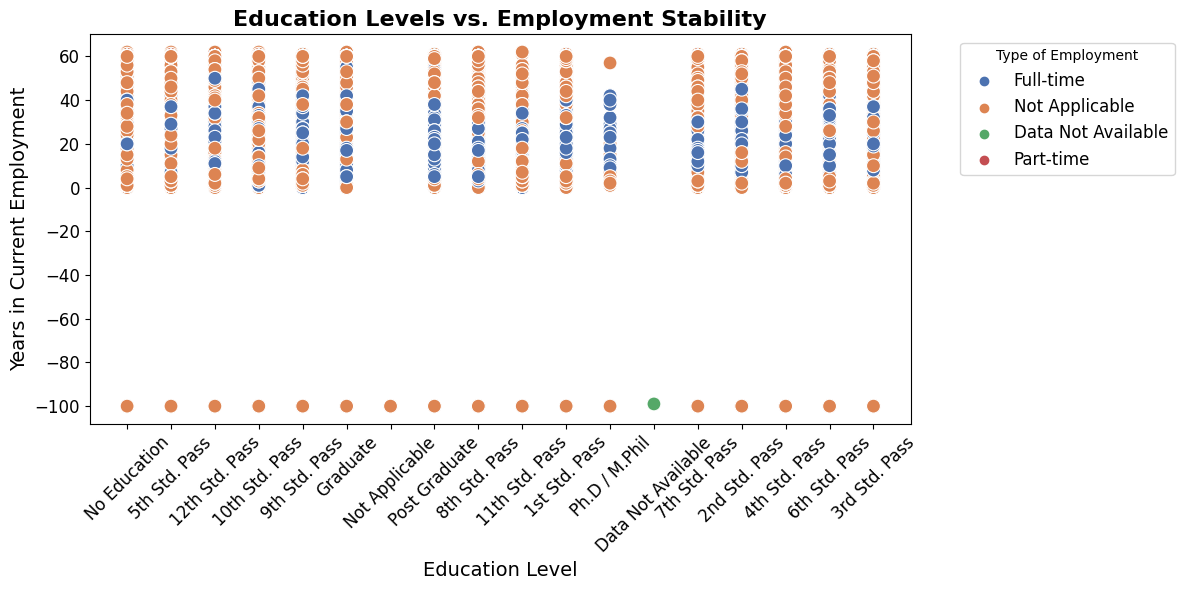

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Education vs. Employment Stability
plt.figure(figsize=(12, 6))

# Improve x-axis handling
unique_edu = wb_data['EDU'].unique()
edu_order = sorted(unique_edu, key=lambda x: str(x))  # Sort logically if applicable

sns.scatterplot(
    data=wb_data, 
    x='EDU', 
    y='EMPLOYMENT_STATUS_SINCE_YRS', 
    hue='TYPE_OF_EMPLOYMENT', 
    palette='deep', 
    s=100  # Adjust marker size
)

# Enhance the plot
plt.title('Education Levels vs. Employment Stability', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Years in Current Employment', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Place legend outside the plot
plt.legend(title='Type of Employment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


**3. Regional Variations**

Heatmap: Regional Employment Disparities

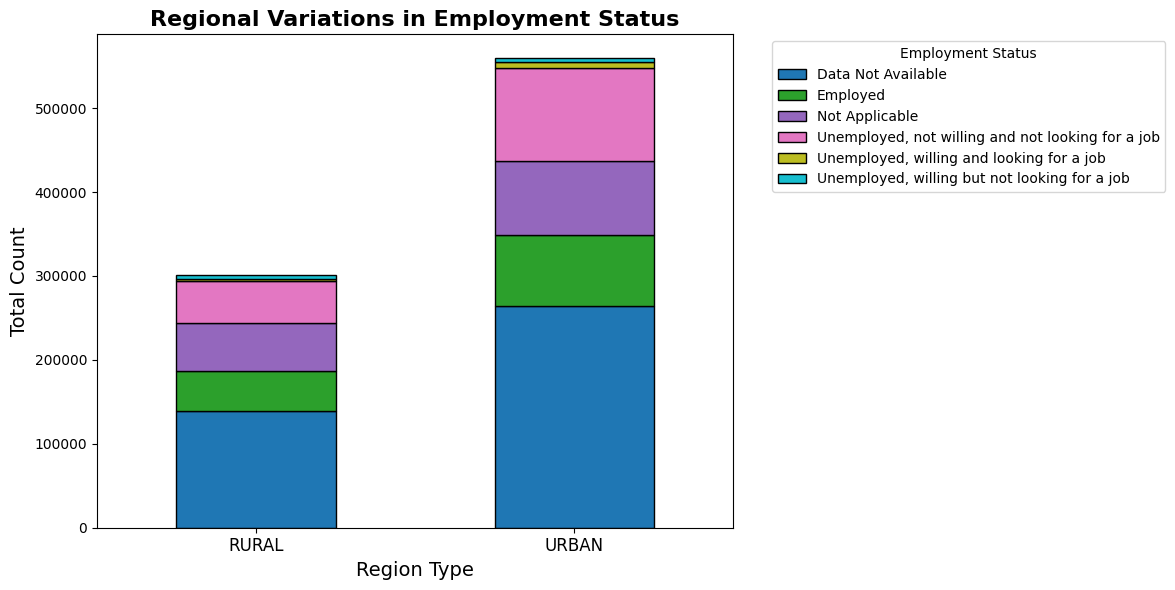

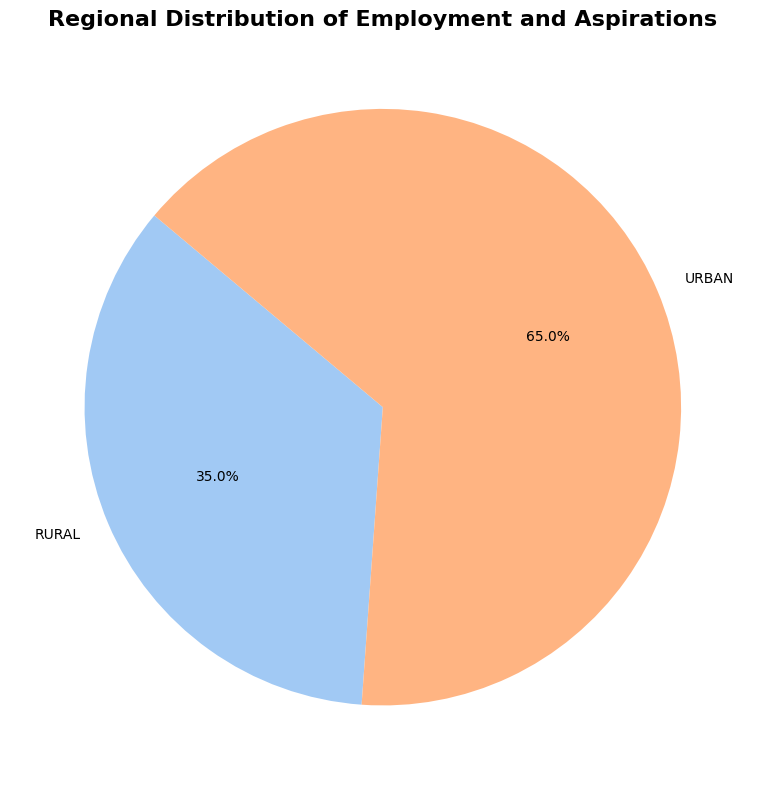

C:\Users\dell\AppData\Local\Temp\ipykernel_7764\3508329730.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


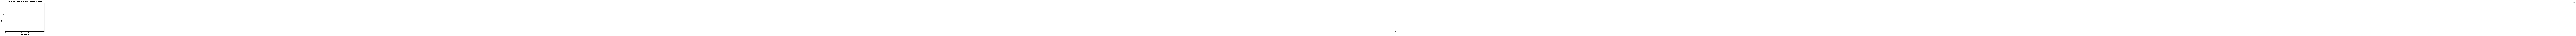

Detailed Regional Summary:
EMPLOYMENT_STATUS  Data Not Available  Employed  Not Applicable  \
REGION_TYPE                                                       
RURAL                          139548     47225           57653   
URBAN                          264350     84445           88106   

EMPLOYMENT_STATUS  Unemployed, not willing and not looking for a job  \
REGION_TYPE                                                            
RURAL                                                          49346   
URBAN                                                         111054   

EMPLOYMENT_STATUS  Unemployed, willing and looking for a job  \
REGION_TYPE                                                    
RURAL                                                   2985   
URBAN                                                   7053   

EMPLOYMENT_STATUS  Unemployed, willing but not looking for a job   Total  \
REGION_TYPE                                                                
RURAL 

In [17]:

# Create region_summary
region_summary = wb_data.groupby('REGION_TYPE').size().reset_index(name='Count')
total_count = region_summary['Count'].sum()
region_summary['Percentage'] = (region_summary['Count'] / total_count * 100).round(2)

# Stacked Bar Chart for REGION_TYPE vs EMPLOYMENT_STATUS
region_employment = wb_data.groupby(['REGION_TYPE', 'EMPLOYMENT_STATUS']).size().reset_index(name='Count')
region_employment_pivot = region_employment.pivot(index='REGION_TYPE', columns='EMPLOYMENT_STATUS', values='Count').fillna(0)

region_employment_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10', edgecolor='black')
plt.title('Regional Variations in Employment Status', fontsize=16, fontweight='bold')
plt.xlabel('Region Type', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Pie Chart for Regional Composition
plt.figure(figsize=(8, 8))
plt.pie(region_summary['Count'], labels=region_summary['REGION_TYPE'], autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Regional Distribution of Employment and Aspirations', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Annotate values
for index, value in enumerate(region_summary['Percentage']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=10)

# Titles and labels
plt.title('Regional Variations in Percentages', fontsize=16, fontweight='bold')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Region Type', fontsize=14)
plt.tight_layout()
plt.show()

# Enhanced Summary Table
region_detailed_summary = wb_data.groupby(['REGION_TYPE', 'EMPLOYMENT_STATUS']).size().unstack(fill_value=0)
region_detailed_summary['Total'] = region_detailed_summary.sum(axis=1)
region_detailed_summary['Percentage'] = (region_detailed_summary['Total'] / region_detailed_summary['Total'].sum() * 100).round(2)

print("Detailed Regional Summary:")
print(region_detailed_summary)


Bar Plot: Employment Status by District

Employment Status Summary Table:
EMPLOYMENT_STATUS  Data Not Available  Employed  Not Applicable  \
DISTRICT                                                          
Bankura                          8665      1820            2273   
Barddhaman                      68961     15041           19245   
Birbhum                          9863      1790            2189   
Dakshin Dinajpur                  459       229             458   
Darjiling                         665      1201            1193   
Haora                           61362     20487           20874   
Hugli                           16758      5469            3529   
Jalpaiguri                      23737     11193           11534   
Koch Bihar                      18718      8525           10260   
Kolkata                         23373      5525            6354   
Maldah                           3298      1649            2181   
Murshidabad                     12452      5860            5646   
Nadia                        

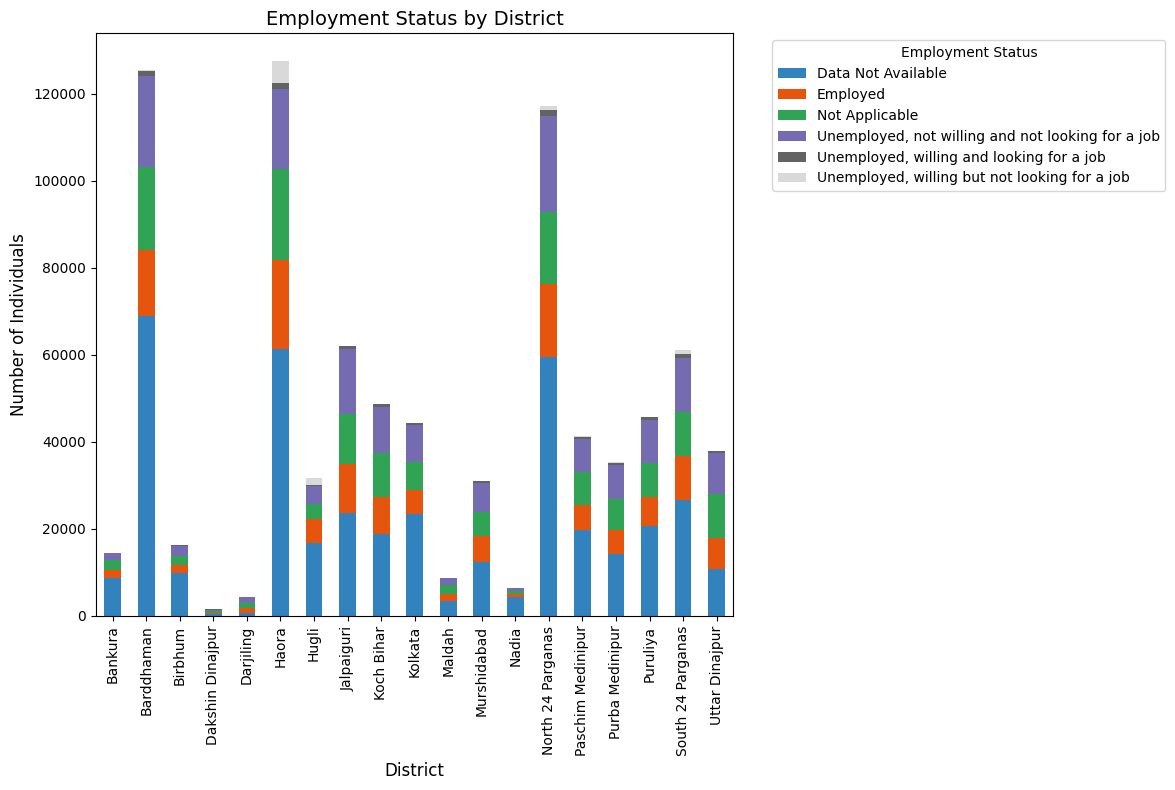

In [10]:
# Group data by District and Employment Status
district_employment = wb_data.groupby(['DISTRICT', 'EMPLOYMENT_STATUS']).size().unstack(fill_value=0)

# Add a Total column for analysis (not for graph)
district_employment['Total'] = district_employment.sum(axis=1)

# Calculate percentage contribution for each employment status within districts
district_employment_percent = district_employment.div(district_employment['Total'], axis=0) * 100
district_employment_percent = district_employment_percent.round(2)

# Display summary table
print("Employment Status Summary Table:")
print(district_employment)
print("\nEmployment Status Percentage Table:")
print(district_employment_percent)

# Plot excluding the "Total" column
district_employment.drop(columns=['Total'], inplace=True)
district_employment.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c')

# Titles and labels
plt.title('Employment Status by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()


**4. Gender and Age Analysis**

Box Plot: Age Distribution by Employment Status and Gender

Gender and Age Analysis Summary:
                GENDER Age_Group  Count  Percentage
0   Data Not Available       <18   4527        1.15
1   Data Not Available     18-25  13581        3.44
2   Data Not Available     26-35      0        0.00
3   Data Not Available     36-50      0        0.00
4   Data Not Available       50+      0        0.00
5                    F       <18  40222       10.18
6                    F     18-25  24004        6.07
7                    F     26-35  30166        7.63
8                    F     36-50  50502       12.78
9                    F       50+  43417       10.98
10                   M       <18  42250       10.69
11                   M     18-25  25971        6.57
12                   M     26-35  31591        7.99
13                   M     36-50  44685       11.31
14                   M       50+  44323       11.21
15      Not Applicable       <18      0        0.00
16      Not Applicable     18-25      0        0.00
17      Not Applicable     26-3

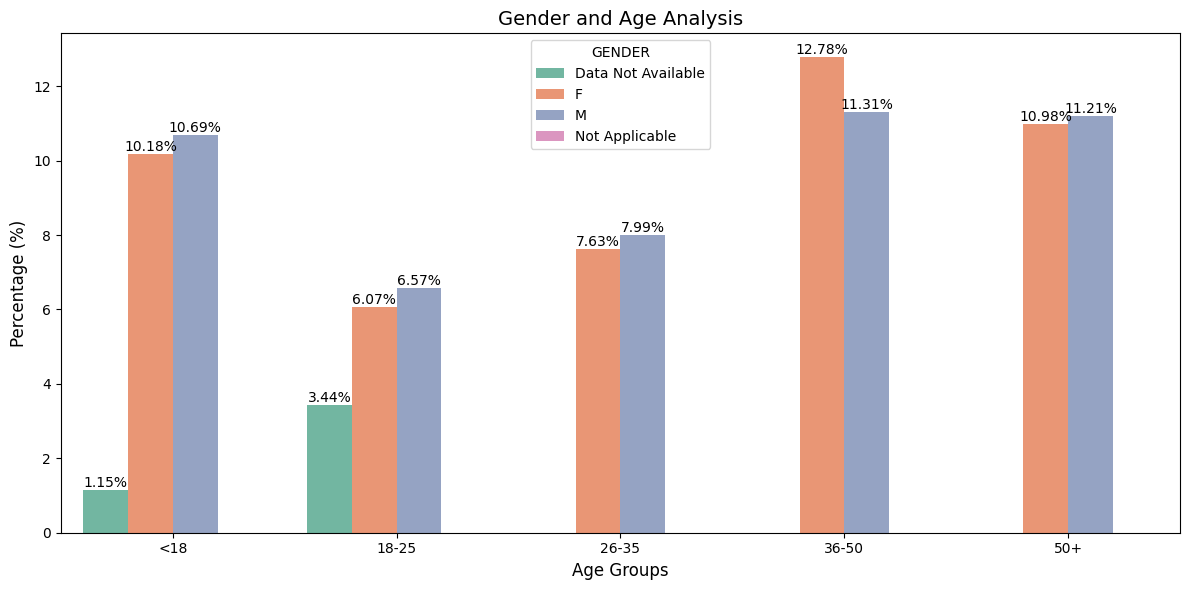

In [19]:
# Create Age Groups
wb_data['Age_Group'] = pd.cut(wb_data['AGE_YRS'], bins=[0, 18, 25, 35, 50, 100], 
                              labels=['<18', '18-25', '26-35', '36-50', '50+'])

# Gender and Age Analysis
gender_age_summary = wb_data.groupby(['GENDER', 'Age_Group']).size().reset_index(name='Count')
total_count = gender_age_summary['Count'].sum()
gender_age_summary['Percentage'] = (gender_age_summary['Count'] / total_count * 100).round(2)

# Data Summary
print("Gender and Age Analysis Summary:")
print(gender_age_summary)

# Bar Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=gender_age_summary, x='Age_Group', y='Percentage', hue='GENDER', palette='Set2')

# Annotate percentages correctly, skipping 0.00%
for p in barplot.patches:
    percentage = p.get_height()
    if percentage > 0:  # Only annotate if the percentage is greater than 0
        barplot.annotate(f"{percentage:.2f}%",  # Annotate with percentage
                         (p.get_x() + p.get_width() / 2., percentage),  # Position at the top of the bar
                         ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Gender and Age Analysis', fontsize=14)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.tight_layout()
plt.show()


Bar Plot: Gender-wise Education Levels

Gender-wise Education Summary:
EDU             10th Std. Pass  11th Std. Pass  12th Std. Pass  1st Std. Pass  \
GENDER                                                                          
F                      22370.0          3862.0         19227.0         8119.0   
M                      23878.0          4126.0         26092.0         5747.0   
Not Applicable           673.0            83.0           778.0           18.0   

EDU             2nd Std. Pass  3rd Std. Pass  4th Std. Pass  5th Std. Pass  \
GENDER                                                                       
F                      8423.0         7856.0        15853.0        20541.0   
M                      6106.0         5814.0        13184.0        18437.0   
Not Applicable           56.0           40.0          162.0          261.0   

EDU             6th Std. Pass  7th Std. Pass  8th Std. Pass  9th Std. Pass  \
GENDER                                                                       
F               

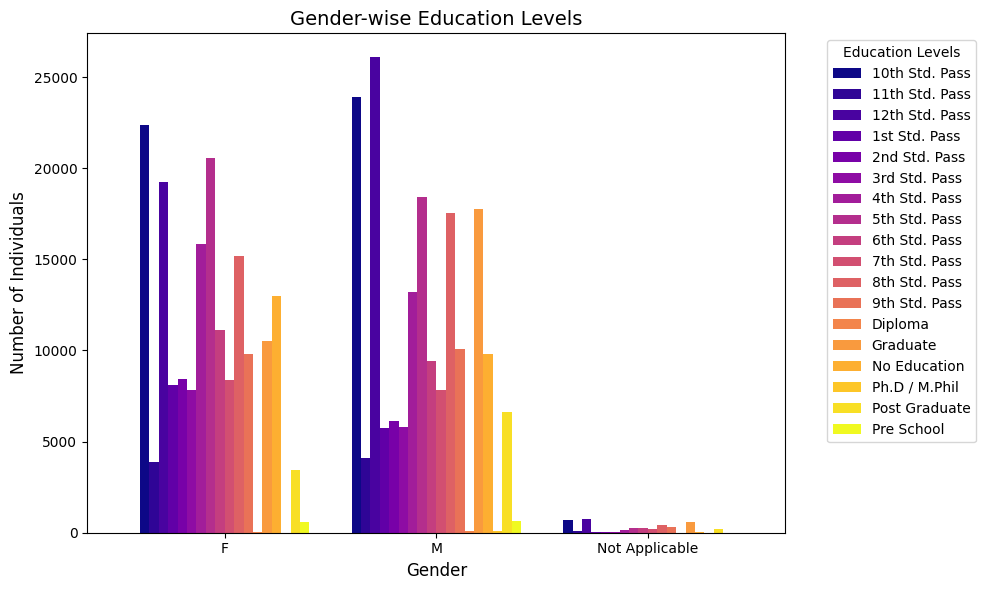

In [24]:
# Remove "Data Not Available" and "Not Applicable" from both GENDER and EDU columns in the original data
wb_data_clean = wb_data[~wb_data['EDU'].isin(['Data Not Available', 'Not Applicable'])]

# Group data by Gender and Education after cleaning
gender_education = wb_data_clean.groupby(['GENDER', 'EDU']).size().unstack()

# Display summary table
print("Gender-wise Education Summary:")
print(gender_education)

# Plot the bar chart with proper bar width and alignment
gender_education.plot(kind='bar', figsize=(10, 6), colormap='plasma', width=0.8)

# Titles and labels
plt.title('Gender-wise Education Levels', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)

# Adjust legend position
plt.legend(title='Education Levels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure x-axis does not display any unwanted categories
plt.xticks(rotation=0)

# Improve layout
plt.tight_layout()
plt.show()
